In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('data/visits.csv', sep='\t')

In [6]:
# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

In [7]:
# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

In [8]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)

#### 1. Постройте график по данным из station_stat_full, где для каждой АЗС будет отдельная точка: по горизонтальной оси — число заездов на АЗС, по вертикальной — медианное время заправки. Добавьте линии сетки.

<AxesSubplot:xlabel='count'>

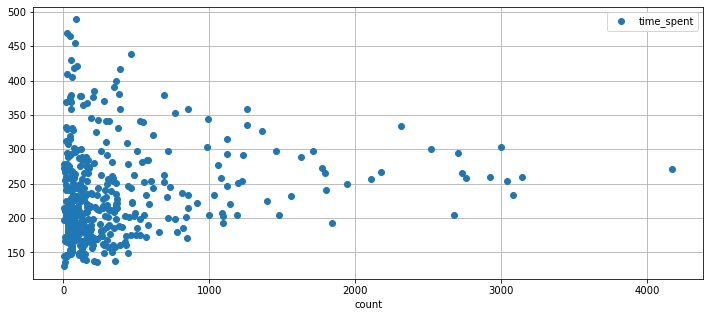

In [10]:
station_stat_full.plot(x='count', # столбец значений для горизонтальной оси
y='time_spent',
style='o', # стиль заполнения:'o'(точечный) или 'o-'(точечно-линейный)
figsize=(12, 5), # размеры картинки: (x_size, y_size)
grid=True) 

#### 2. По данным из таблицы station_stat_full посчитайте коэффициент корреляции Пирсона между числом заездов на АЗС и временем заправки. Коэффициент выведите на экран.

In [12]:
station_stat_full['count'].corr(station_stat_full['time_spent'])

0.12242632473597156

#### 3. Создайте переменную station_stat_multi, где для каждой АЗС будет 3 числа:
- среднее (не медиана) продолжительности заезда на АЗС;
-  средняя доля быстрых заездов;
-  средняя доля медленных заездов.

Распечатайте матрицу корреляции между этими величинами. Постройте диаграмму рассеяния попарно для всех величин методом scatter_matrix(). Задайте размер 9х9 дюймов.

In [19]:
station_stat_multi = data.pivot_table(index='id', values=['time_spent', 'too_fast', 'too_slow'])
station_stat_multi

,time_spent,too_fast,too_slow
id,,,
00ca1b70,147.823864,0.250000,0.005682
011f7462,109.353346,0.637489,0.006416
015eaddd,103.654762,0.726190,0.011905
0178ce70,204.375000,0.211538,0.000000
018a83ef,159.612954,0.510269,0.023697
...,...,...,...
fbbd8cc2,479.413223,0.239669,0.082645
fc4b1b72,375.724377,0.191136,0.056787
fc661c22,24.199689,0.912344,0.000519


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

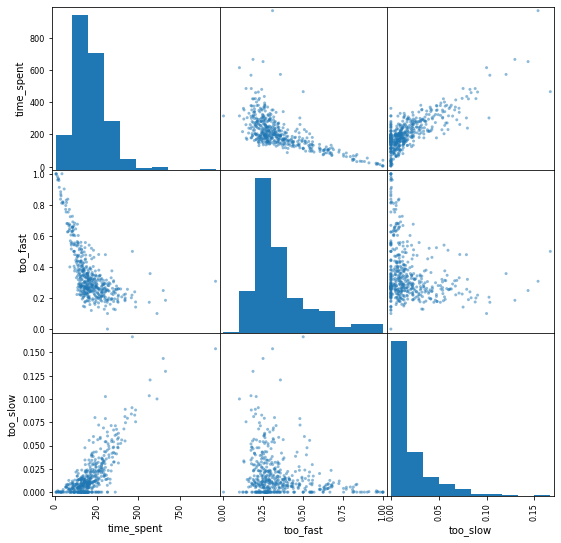

In [18]:
b

#### 4. Добавьте в таблицу station_stat_multi столбец good_time_spent из данных good_stations_stat.
Распечатайте матрицу корреляции для station_stat_multi. Постройте диаграммы рассеяния попарно для всех величин методом scatter_matrix. Задайте размер 9х9 дюймов.

In [22]:
station_stat_multi['good_time_spent'] = good_stations_stat['time_spent']
station_stat_multi.corr()

,time_spent,too_fast,too_slow,good_time_spent
time_spent,1.000000,-0.640658,0.802247,0.702429
too_fast,-0.640658,1.000000,-0.255876,-0.315120
too_slow,0.802247,-0.255876,1.000000,0.445926
good_time_spent,0.702429,-0.315120,0.445926,1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>,
        <AxesSubplot:xlabel='good_time_spent', ylabel='too_slow'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='good_time_spent'>,
        <AxesSubplot:xlabel='good_time_

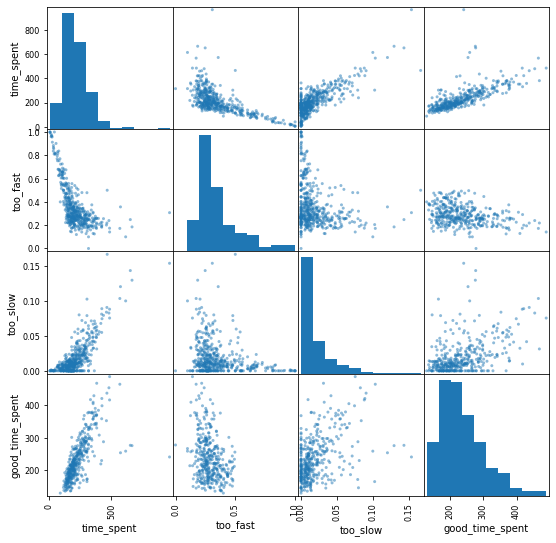

In [23]:
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9)) 